In [4]:
from  google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format = '{:.6f}'.format
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import roc_auc_score,auc,confusion_matrix,classification_report,accuracy_score,auc,roc_curve,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
df=pd.read_csv('/content/drive/My Drive/df_merged.csv')
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,campaign_period,campaign_Year,campaign_month,campaign_quarter,campaign_customer_nunique,campaign_coupon_nunique,category_count_Food & Dairy,category_count_Garden,category_count_Grocery,category_count_Health & Personal care,category_count_Meat & Fish,category_count_Miscellaneous,category_count_Established,category_count_Local,coupon_unique_brand,coupon_item_count,average_item_quantity_purchased,average_selling_price,average_other_discount,average_coupon_discount,average_discount_percent,total_item_customer_purchased,no_of_customer_visits,item_purchased_Food & Dairy_category,item_purchased_Garden_category,item_purchased_Grocery_category,item_purchased_Health & Personal care_category,item_purchased_Meat & Fish_category,item_purchased_Miscellaneous_category,no_of_coupon_discount
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,56,2013,5,6,1077,207,0.000000,0.000000,125.000000,0.000000,0.000000,0.000000,125.000000,0.000000,2,125,460.000000,149.277286,-27.687286,0.000000,10.438539,70,24,0.000000,0.000000,41.000000,6.000000,17.000000,6.000000,0
1,2,13,116,48,0,X,2013-05-19,2013-05-07,56,2013,5,6,1077,207,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1,3,76.000000,327.843205,-35.644808,-5.137500,17.693347,156,29,4.000000,0.000000,98.000000,30.000000,21.000000,3.000000,6
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,31,2013,11,8,176,18,0.000000,0.000000,0.000000,67.000000,0.000000,0.000000,67.000000,0.000000,1,67,2.000000,117.771477,-18.151711,-2.736040,12.490265,298,26,7.000000,0.000000,207.000000,45.000000,38.000000,1.000000,29
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,56,2013,5,6,1077,207,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1,4,1.000000,87.685000,-8.998026,0.000000,9.597842,76,23,1.000000,0.000000,63.000000,11.000000,0.000000,1.000000,0
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,77,2013,2,5,1076,208,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,32.000000,0.000000,1,32,137.000000,128.862871,-28.806832,-0.193960,17.530689,101,18,3.000000,0.000000,60.000000,19.000000,15.000000,4.000000,1


In [7]:
df.shape

(78357, 38)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78357 entries, 0 to 78356
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              78357 non-null  int64  
 1   campaign_id                                     78357 non-null  int64  
 2   coupon_id                                       78357 non-null  int64  
 3   customer_id                                     78357 non-null  int64  
 4   redemption_status                               78357 non-null  int64  
 5   campaign_type                                   78357 non-null  object 
 6   start_date                                      78357 non-null  object 
 7   end_date                                        78357 non-null  object 
 8   campaign_period                                 78357 non-null  int64  
 9   campaign_Year                          

In [9]:
df.nunique()

id                                                78357
campaign_id                                          18
coupon_id                                           866
customer_id                                        1428
redemption_status                                     2
campaign_type                                         2
start_date                                           17
end_date                                             17
campaign_period                                      12
campaign_Year                                         2
campaign_month                                        9
campaign_quarter                                      6
campaign_customer_nunique                            17
campaign_coupon_nunique                              17
category_count_Food & Dairy                          25
category_count_Garden                                 5
category_count_Grocery                               88
category_count_Health & Personal care           

Dropping id,customer_id,coupon_id,staert_date, end_date & campaign_id categorical columns since it has lot of unique values and it is not significant features for model building

In [10]:
df.drop(["id","coupon_id","campaign_id","customer_id","start_date","end_date"],axis=1,inplace=True)

In [11]:
df.shape

(78357, 32)

In [12]:
df.campaign_Year=df.campaign_Year.astype('object')
df.campaign_month=df.campaign_month.astype('object')

In [13]:
df.describe()

,redemption_status,campaign_period,campaign_quarter,campaign_customer_nunique,campaign_coupon_nunique,category_count_Food & Dairy,category_count_Garden,category_count_Grocery,category_count_Health & Personal care,category_count_Meat & Fish,category_count_Miscellaneous,category_count_Established,category_count_Local,coupon_unique_brand,coupon_item_count,average_item_quantity_purchased,average_selling_price,average_other_discount,average_coupon_discount,average_discount_percent,total_item_customer_purchased,no_of_customer_visits,item_purchased_Food & Dairy_category,item_purchased_Garden_category,item_purchased_Grocery_category,item_purchased_Health & Personal care_category,item_purchased_Meat & Fish_category,item_purchased_Miscellaneous_category,no_of_coupon_discount
count,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000,78357.000000
mean,0.009150,72.235435,5.319971,714.222711,153.076611,2.278265,1.947369,34.320163,29.389397,13.693352,0.196179,69.907615,11.917110,6.874051,81.824725,118.282170,114.817709,-18.528505,-0.542103,13.379931,330.126307,34.662060,12.965555,0.531886,232.839325,55.569700,23.664140,4.555700,4.849701
std,0.095220,30.014823,1.175377,428.162422,81.439482,20.845629,37.866852,246.582343,478.290913,215.545526,2.625308,532.445055,87.907183,64.703696,604.803146,211.711028,34.686206,9.743937,1.193340,3.968070,238.530767,22.070984,19.030259,1.237576,170.906935,52.382202,20.005253,7.383978,11.277907
min,0.000000,31.000000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,39.862979,-232.773772,-17.809848,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,56.000000,5.000000,214.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,5.000000,1.000000,93.640597,-21.325164,-0.598799,10.591091,159.000000,19.000000,3.000000,0.000000,113.000000,20.000000,9.000000,0.000000,0.000000
50%,0.000000,62.000000,5.000000,1076.000000,207.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,12.000000,13.000000,109.394206,-17.263445,-0.128240,12.857054,272.000000,30.000000,7.000000,0.000000,192.000000,39.000000,18.000000,1.000000,1.000000
75%,0.000000,77.000000,6.000000,1077.000000,208.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,27.000000,0.000000,1.000000,30.000000,158.000000,129.391844,-13.709114,0.000000,15.780453,435.000000,45.000000,15.000000,1.000000,316.000000,72.000000,33.000000,6.000000,4.000000
max,1.000000,182.000000,8.000000,1077.000000,208.000000,276.000000,747.000000,4127.000000,11786.000000,4340.000000,50.000000,10744.000000,1171.000000,1187.000000,11813.000000,2713.000000,468.756667,0.000000,0.000000,40.161368,1775.000000,146.000000,227.000000,11.000000,1277.000000,466.000000,128.000000,58.000000,100.000000


In [14]:
df.describe(include='object')

,campaign_type,campaign_Year,campaign_month
count,78357,78357,78357
unique,2,2,9
top,X,2013,2
freq,57675,59821,24136


### Checking null values

In [15]:
df.isnull().sum()

redemption_status                                 0
campaign_type                                     0
campaign_period                                   0
campaign_Year                                     0
campaign_month                                    0
campaign_quarter                                  0
campaign_customer_nunique                         0
campaign_coupon_nunique                           0
category_count_Food & Dairy                       0
category_count_Garden                             0
category_count_Grocery                            0
category_count_Health & Personal care             0
category_count_Meat & Fish                        0
category_count_Miscellaneous                      0
category_count_Established                        0
category_count_Local                              0
coupon_unique_brand                               0
coupon_item_count                                 0
average_item_quantity_purchased                   0
average_sell

In [ ]:
df.corr()

,redemption_status,campaign_period,campaign_quarter,campaign_customer_nunique,campaign_coupon_nunique,category_count_Food & Dairy,category_count_Garden,category_count_Grocery,category_count_Health & Personal care,category_count_Meat & Fish,category_count_Miscellaneous,category_count_Established,category_count_Local,coupon_unique_brand,coupon_item_count,average_item_quantity_purchased,average_selling_price,average_other_discount,average_coupon_discount,average_discount_percent,total_item_customer_purchased,no_of_customer_visits,item_purchased_Food & Dairy_category,item_purchased_Garden_category,item_purchased_Grocery_category,item_purchased_Health & Personal care_category,item_purchased_Meat & Fish_category,item_purchased_Miscellaneous_category,no_of_coupon_discount
redemption_status,1.000000,-0.018691,0.012382,0.034098,0.031918,0.031155,0.002990,0.075881,0.013219,0.032297,0.015486,0.050255,0.068711,0.041253,0.054230,0.018800,0.003318,-0.015716,-0.062058,0.039494,0.038440,0.007083,0.018042,0.015123,0.038844,0.031857,0.016145,0.023916,0.106682
campaign_period,-0.018691,1.000000,-0.579251,-0.167344,-0.004124,-0.038222,-0.009195,-0.033306,-0.020158,-0.013042,-0.016622,-0.034104,-0.042039,-0.023573,-0.036134,0.016917,0.009024,0.002488,-0.003228,-0.011760,0.016677,0.034176,0.033768,-0.010337,0.013580,0.014534,0.008888,0.011929,-0.010765
campaign_quarter,0.012382,-0.579251,1.000000,0.134239,-0.181137,0.044844,0.006874,0.023860,0.030988,0.010263,0.015495,0.038896,0.039163,0.021807,0.039935,0.015649,0.023940,0.015829,-0.003793,-0.022930,-0.053693,-0.072290,-0.066036,-0.020552,-0.056327,-0.014303,-0.059996,0.006868,-0.005910
campaign_customer_nunique,0.034098,-0.167344,0.134239,1.000000,0.859626,0.047692,0.043272,0.062281,0.035677,0.051861,0.056866,0.071802,0.092727,0.074995,0.076689,-0.014634,-0.026657,0.000808,0.016042,0.008730,-0.148102,-0.092386,-0.091609,-0.060078,-0.139814,-0.140567,-0.092836,-0.053302,-0.071604
campaign_coupon_nunique,0.031918,-0.004124,-0.181137,0.859626,1.000000,0.028511,0.034334,0.046541,0.024936,0.040935,0.043324,0.051880,0.075205,0.059208,0.056604,-0.015042,-0.030948,-0.024762,0.003662,0.037665,-0.101856,-0.023839,-0.074086,-0.048487,-0.091699,-0.116812,-0.037637,-0.038192,-0.046972
category_count_Food & Dairy,0.031155,-0.038222,0.044844,0.047692,0.028511,1.000000,0.641999,0.571235,0.140721,0.088873,0.615245,0.435881,0.477857,0.314294,0.453188,-0.000437,-0.001681,-0.000304,-0.003837,-0.000267,-0.013040,-0.011042,-0.001503,-0.006864,-0.011973,-0.015040,-0.009212,-0.007421,-0.000204
category_count_Garden,0.002990,-0.009195,0.006874,0.043272,0.034334,0.641999,1.000000,-0.002526,0.218229,-0.001850,0.941225,0.277654,0.105116,0.292779,0.259714,0.000603,0.002664,0.001024,-0.003672,-0.001916,-0.007116,-0.006233,-0.004818,-0.004845,-0.006175,-0.009378,-0.001205,-0.003920,0.001100
category_count_Grocery,0.075881,-0.033306,0.023860,0.062281,0.046541,0.571235,-0.002526,1.000000,-0.005236,0.092779,0.024259,0.386328,0.799178,0.182628,0.456268,0.001120,-0.005804,-0.002860,-0.001574,0.005628,-0.009339,-0.008753,-0.000286,-0.005767,-0.008388,-0.011185,-0.007671,-0.005712,-0.000975
category_count_Health & Personal care,0.013219,-0.020158,0.030988,0.035677,0.024936,0.140721,0.218229,-0.005236,1.000000,-0.001977,0.278256,0.837016,0.487289,0.371300,0.807703,0.000694,0.000735,0.003226,-0.002136,-0.001679,0.000603,-0.000761,-0.000456,0.002036,0.000693,-0.000405,0.002095,0.001456,0.005261
category_count_Meat & Fish,0.032297,-0.013042,0.010263,0.051861,0.040935,0.088873,-0.001850,0.092779,-0.001977,1.000000,0.321516,0.399397,0.312230,0.894537,0.396996,0.001258,-0.003570,-0.003401,-0.002342,0.001684,0.000575,0.005682,0.002445,-0.000654,0.000846,-0.002351,0.002070,0.003887,0.000257


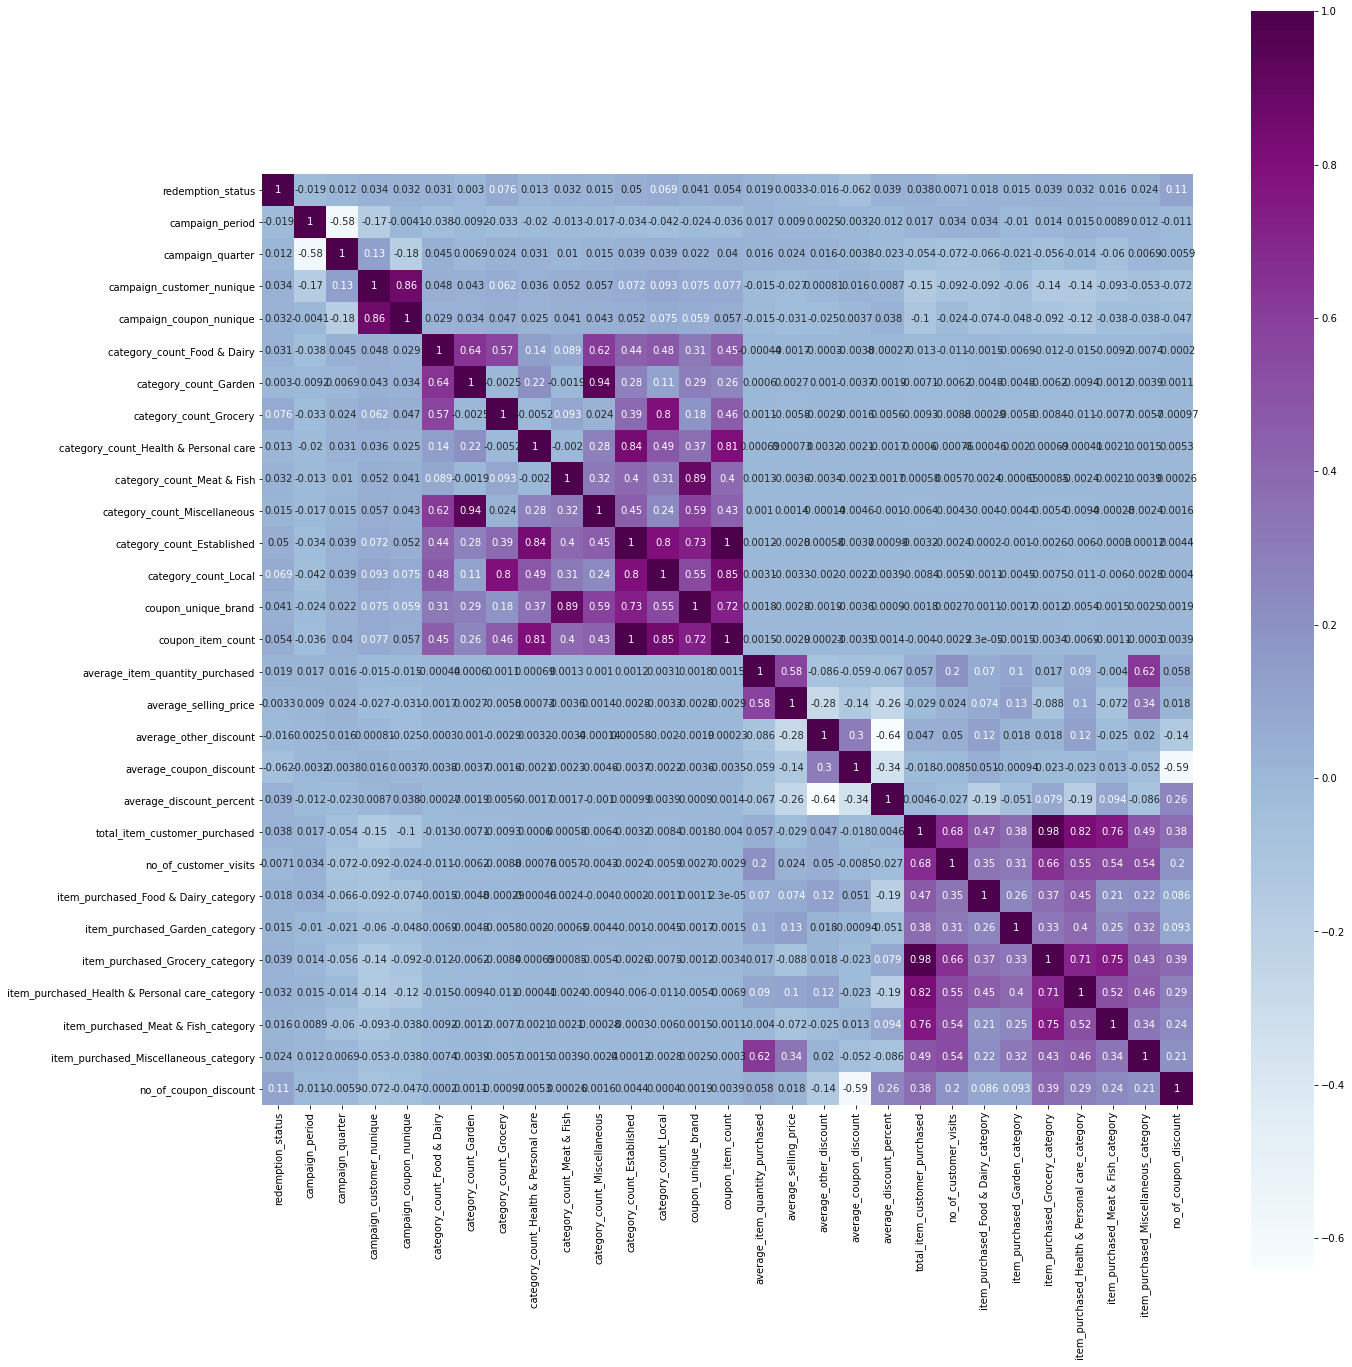

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),square=True,cmap="BuPu",annot=True)
plt.tight_layout()
plt.show()

In [ ]:
# We can observe that coupon_item_count and category_count_established are highly correlated i.e. 1 and hence droping category_count_established feature

In [16]:
df=df.drop('category_count_Established',axis=1)

In [17]:
df.shape

(78357, 31)

In [ ]:
df.columns

Index(['redemption_status', 'campaign_type', 'campaign_period',
       'campaign_Year', 'campaign_month', 'campaign_quarter',
       'campaign_customer_nunique', 'campaign_coupon_nunique',
       'category_count_Food & Dairy', 'category_count_Garden',
       'category_count_Grocery', 'category_count_Health & Personal care',
       'category_count_Meat & Fish', 'category_count_Miscellaneous',
       'category_count_Local', 'coupon_unique_brand', 'coupon_item_count',
       'average_item_quantity_purchased', 'average_selling_price',
       'average_other_discount', 'average_coupon_discount',
       'average_discount_percent', 'total_item_customer_purchased',
       'no_of_customer_visits', 'item_purchased_Food & Dairy_category',
       'item_purchased_Garden_category', 'item_purchased_Grocery_category',
       'item_purchased_Health & Personal care_category',
       'item_purchased_Meat & Fish_category',
       'item_purchased_Miscellaneous_category', 'no_of_coupon_discount'],
      dtyp

In [18]:
num_list=['campaign_period', 'campaign_quarter',
       'campaign_customer_nunique', 'campaign_coupon_nunique',
       'category_count_Food & Dairy', 'category_count_Garden',
       'category_count_Grocery', 'category_count_Health & Personal care',
       'category_count_Meat & Fish', 'category_count_Miscellaneous',
       'category_count_Local', 'coupon_unique_brand', 'coupon_item_count',
       'average_item_quantity_purchased', 'average_selling_price',
       'average_other_discount', 'average_coupon_discount',
       'average_discount_percent', 'total_item_customer_purchased',
       'no_of_customer_visits', 'item_purchased_Food & Dairy_category',
       'item_purchased_Garden_category', 'item_purchased_Grocery_category',
       'item_purchased_Health & Personal care_category',
       'item_purchased_Meat & Fish_category',
       'item_purchased_Miscellaneous_category', 'no_of_coupon_discount']

cat_list=['campaign_type','campaign_Year','campaign_month']

### Checking Outliers

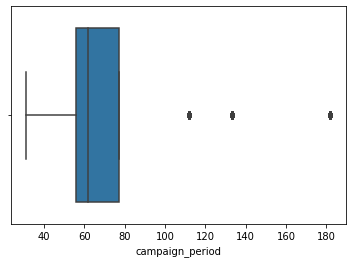

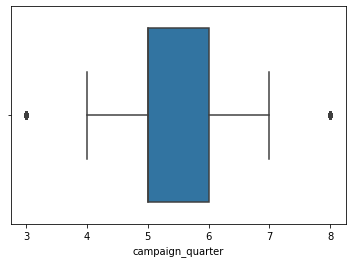

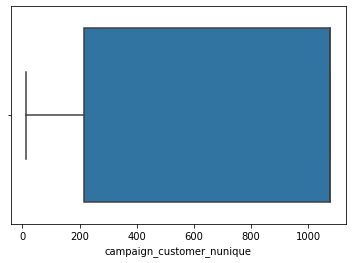

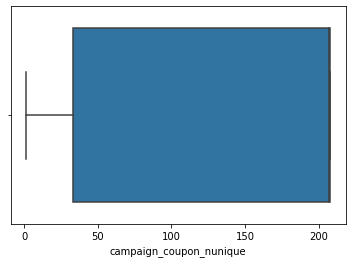

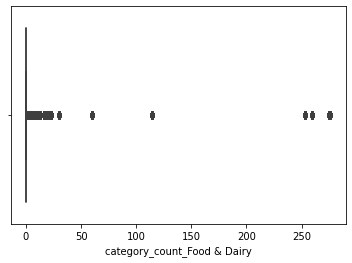

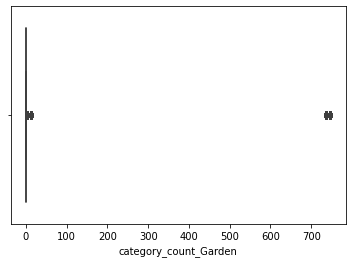

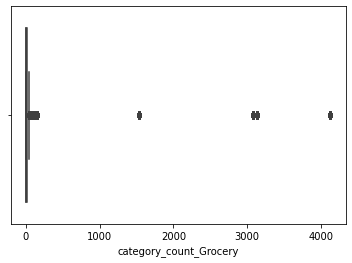

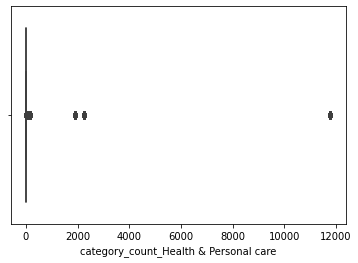

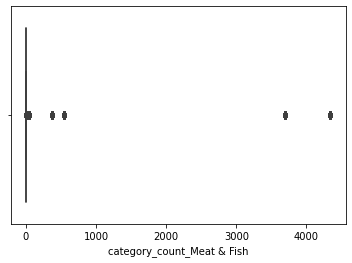

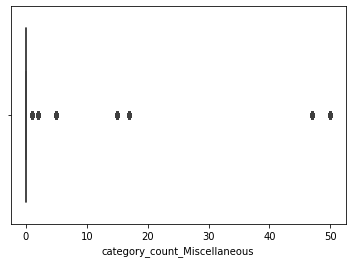

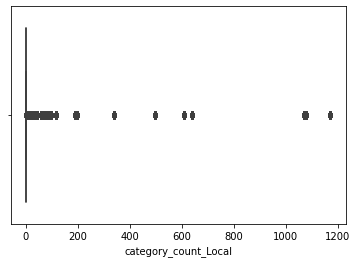

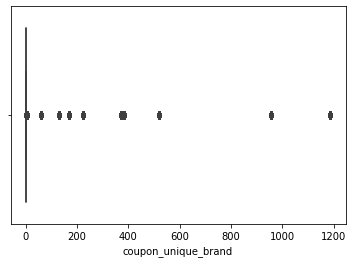

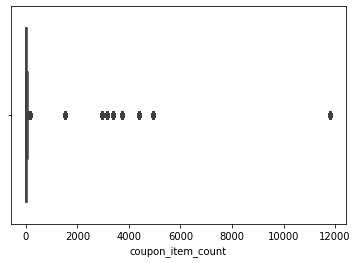

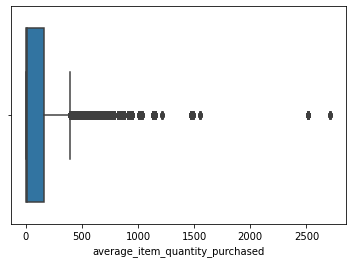

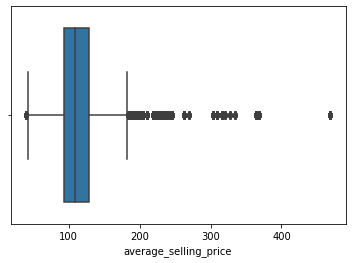

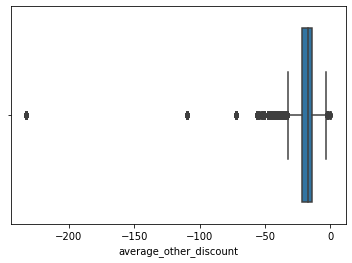

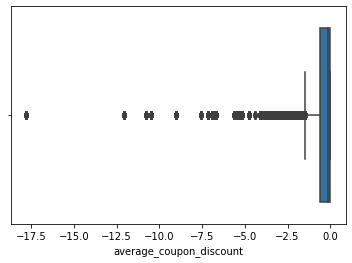

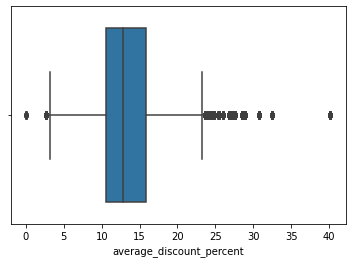

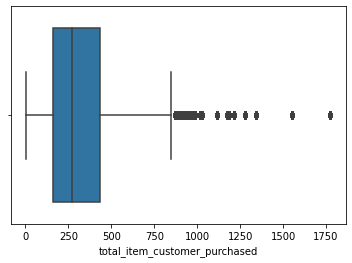

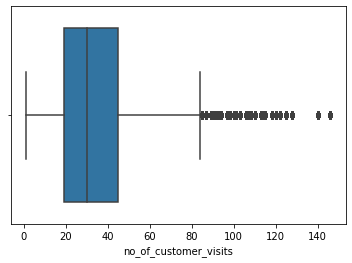

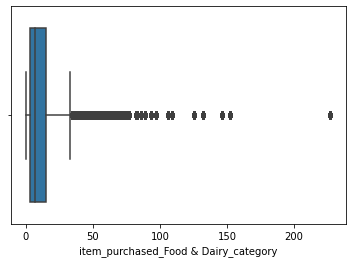

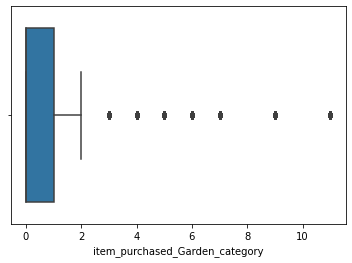

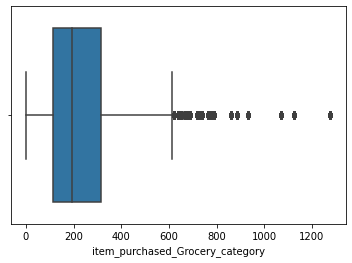

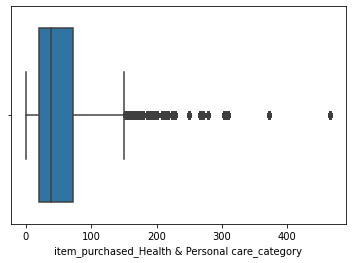

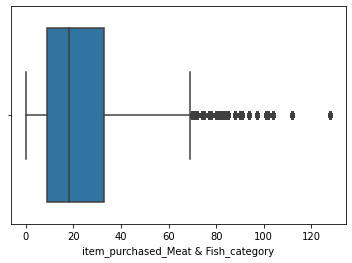

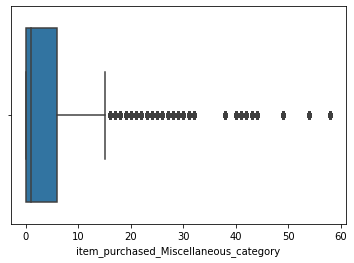

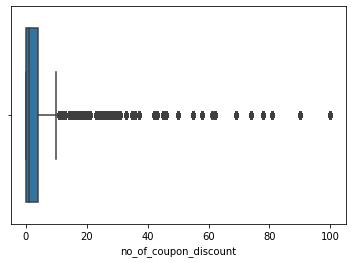

In [ ]:
for i in num_list:
    sns.boxplot(df[i])
    plt.show()

### Data Distribution

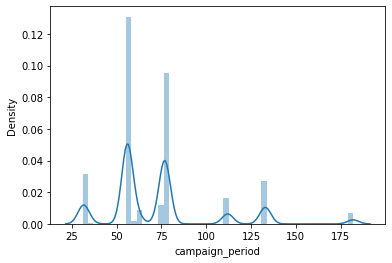

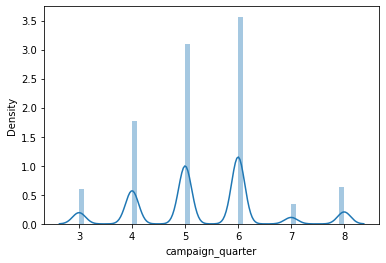

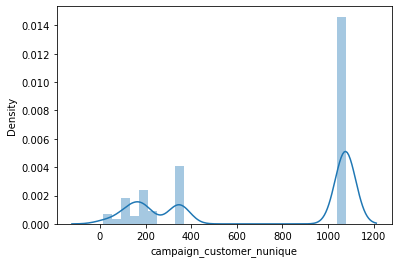

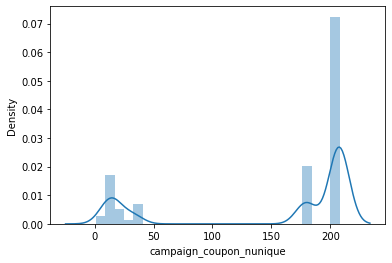

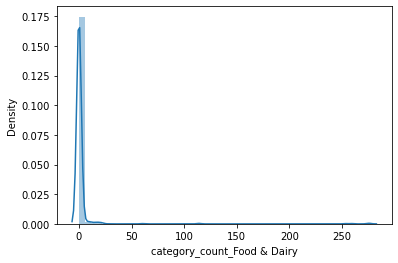

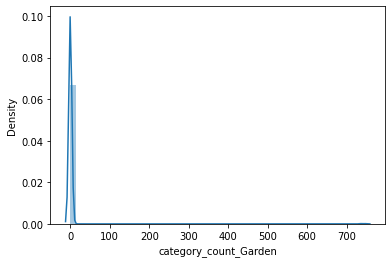

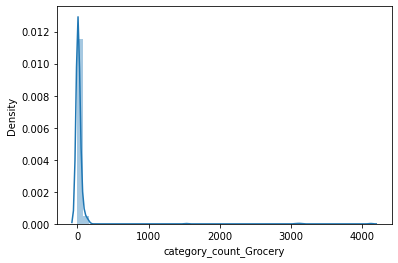

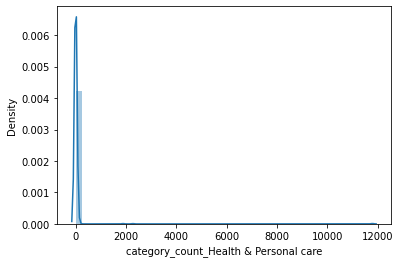

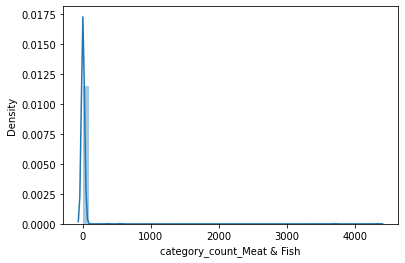

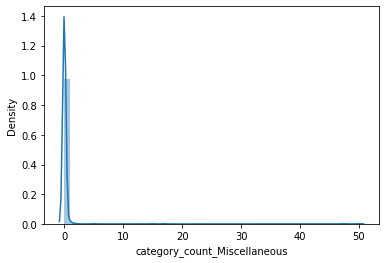

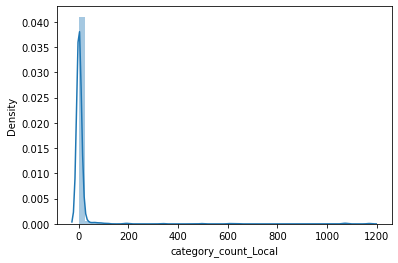

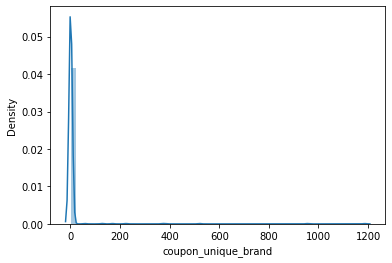

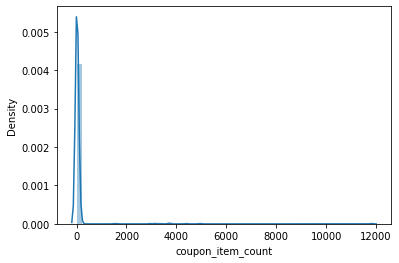

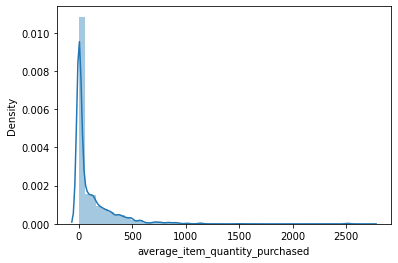

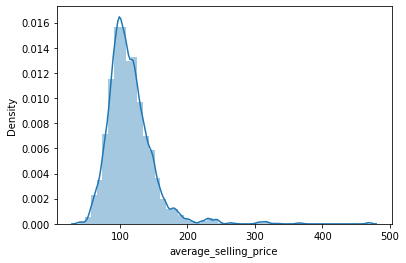

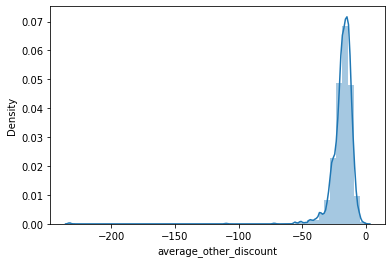

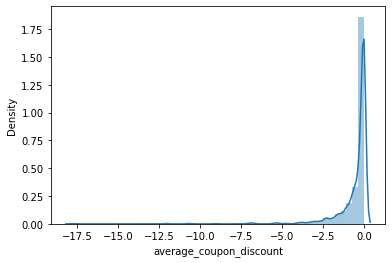

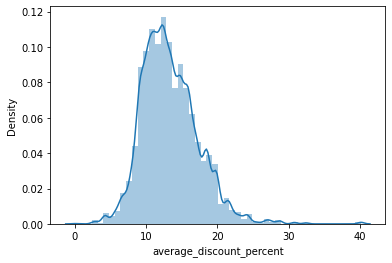

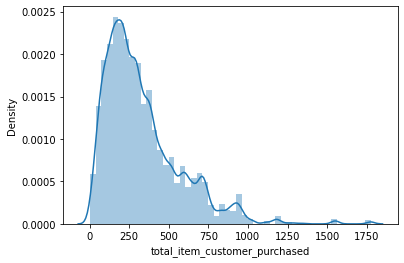

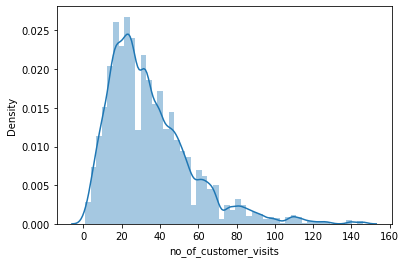

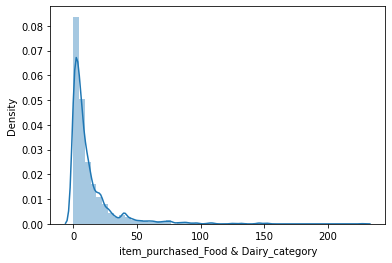

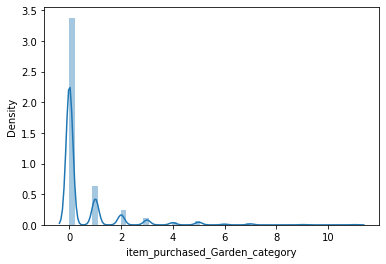

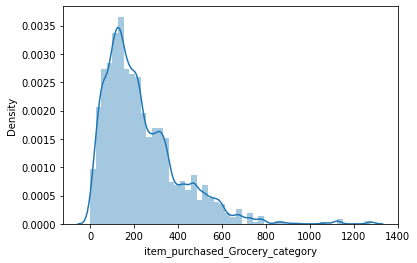

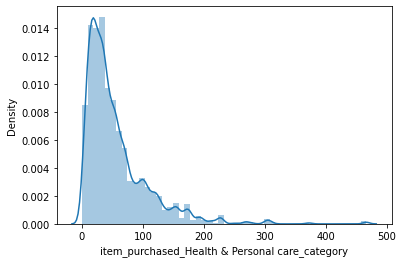

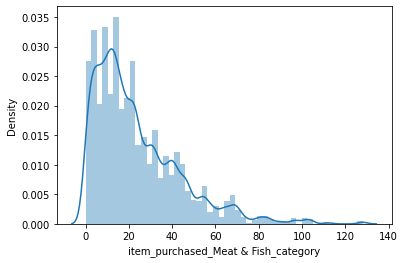

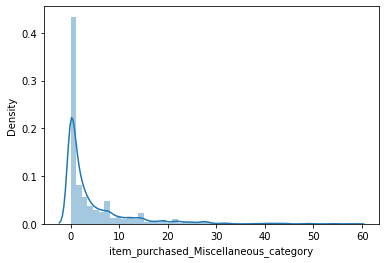

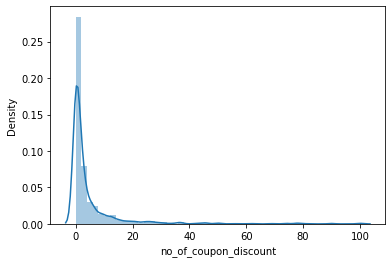

In [ ]:
for i in num_list:
    sns.distplot(df[i])
    plt.show()

### Checking for Multicollinearity in data

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
df_num=df[num_list]

In [ ]:
df_num.head()

,campaign_period,campaign_quarter,campaign_customer_nunique,campaign_coupon_nunique,category_count_Food & Dairy,category_count_Garden,category_count_Grocery,category_count_Health & Personal care,category_count_Meat & Fish,category_count_Miscellaneous,category_count_Local,coupon_unique_brand,coupon_item_count,average_item_quantity_purchased,average_selling_price,average_other_discount,average_coupon_discount,average_discount_percent,total_item_customer_purchased,no_of_customer_visits,item_purchased_Food & Dairy_category,item_purchased_Garden_category,item_purchased_Grocery_category,item_purchased_Health & Personal care_category,item_purchased_Meat & Fish_category,item_purchased_Miscellaneous_category,no_of_coupon_discount
0,56,6,1077,207,0.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,2,125,460.000000,149.277286,-27.687286,0.000000,10.438539,70,24,0.000000,0.000000,41.000000,6.000000,17.000000,6.000000,0
1,56,6,1077,207,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1,3,76.000000,327.843205,-35.644808,-5.137500,17.693347,156,29,4.000000,0.000000,98.000000,30.000000,21.000000,3.000000,6
2,31,8,176,18,0.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,1,67,2.000000,117.771477,-18.151711,-2.736040,12.490265,298,26,7.000000,0.000000,207.000000,45.000000,38.000000,1.000000,29
3,56,6,1077,207,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1,4,1.000000,87.685000,-8.998026,0.000000,9.597842,76,23,1.000000,0.000000,63.000000,11.000000,0.000000,1.000000,0
4,77,5,1076,208,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,1,32,137.000000,128.862871,-28.806832,-0.193960,17.530689,101,18,3.000000,0.000000,60.000000,19.000000,15.000000,4.000000,1


In [ ]:
df_num.shape

(78357, 27)

In [ ]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif["Features"]=df_num.columns
vif.sort_values("VIF",ascending=False)

,VIF,Features
12,inf,coupon_item_count
9,inf,category_count_Miscellaneous
22,inf,item_purchased_Grocery_category
21,inf,item_purchased_Garden_category
20,inf,item_purchased_Food & Dairy_category
18,inf,total_item_customer_purchased
25,inf,item_purchased_Miscellaneous_category
24,inf,item_purchased_Meat & Fish_category
23,inf,item_purchased_Health & Personal care_category
8,inf,category_count_Meat & Fish


In [ ]:
# We can observe there is multicollinerity problem in the data 

In [ ]:
df_num1=df_num.copy()

In [ ]:
df_num1.shape

(78357, 27)

In [ ]:
l1=[]
while df_num1.shape[1]>=0:
    vif=pd.DataFrame()
    vif["VIF"]=[variance_inflation_factor(df_num1.values,i) for i in range(df_num1.shape[1])]
    vif["Features"]=df_num1.columns
    vif=vif.sort_values("VIF",ascending=False).reset_index(drop=True)
    if vif["VIF"][0]>5:
        l1.append(vif["Features"][0])
        df_num1=df_num1.drop(vif["Features"][0],axis=1)
    else:
        break
        
print(vif)

        VIF                                        Features
0  4.225783                          average_other_discount
1  4.111267                                 campaign_period
2  4.064859  item_purchased_Health & Personal care_category
3  3.922142                     category_count_Food & Dairy
4  3.560043             item_purchased_Meat & Fish_category
5  3.261422           item_purchased_Miscellaneous_category
6  2.824130                       campaign_customer_nunique
7  2.662593                           category_count_Garden
8  2.438709                 average_item_quantity_purchased
9  2.317702                          category_count_Grocery
10 2.140650                           no_of_coupon_discount
11 2.109249                         average_coupon_discount
12 1.853236            item_purchased_Food & Dairy_category
13 1.055043           category_count_Health & Personal care
14 1.020590                      category_count_Meat & Fish


In [ ]:
l1 # we need to remove below features to remove multicollinearity

['coupon_item_count',
 'item_purchased_Garden_category',
 'total_item_customer_purchased',
 'coupon_unique_brand',
 'category_count_Miscellaneous',
 'average_discount_percent',
 'campaign_coupon_nunique',
 'category_count_Local',
 'average_selling_price',
 'item_purchased_Grocery_category',
 'campaign_quarter',
 'no_of_customer_visits']

In [ ]:
len(l1)

12

### Encoding categorical columns

In [19]:
df=pd.get_dummies(df,columns=["campaign_type","campaign_Year","campaign_month"],drop_first=True)
df.head()

,redemption_status,campaign_period,campaign_quarter,campaign_customer_nunique,campaign_coupon_nunique,category_count_Food & Dairy,category_count_Garden,category_count_Grocery,category_count_Health & Personal care,category_count_Meat & Fish,category_count_Miscellaneous,category_count_Local,coupon_unique_brand,coupon_item_count,average_item_quantity_purchased,average_selling_price,average_other_discount,average_coupon_discount,average_discount_percent,total_item_customer_purchased,no_of_customer_visits,item_purchased_Food & Dairy_category,item_purchased_Garden_category,item_purchased_Grocery_category,item_purchased_Health & Personal care_category,item_purchased_Meat & Fish_category,item_purchased_Miscellaneous_category,no_of_coupon_discount,campaign_type_Y,campaign_Year_2013,campaign_month_2,campaign_month_4,campaign_month_5,campaign_month_7,campaign_month_8,campaign_month_9,campaign_month_11,campaign_month_12
0,0,56,6,1077,207,0.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,2,125,460.000000,149.277286,-27.687286,0.000000,10.438539,70,24,0.000000,0.000000,41.000000,6.000000,17.000000,6.000000,0,0,1,0,0,1,0,0,0,0,0
1,0,56,6,1077,207,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1,3,76.000000,327.843205,-35.644808,-5.137500,17.693347,156,29,4.000000,0.000000,98.000000,30.000000,21.000000,3.000000,6,0,1,0,0,1,0,0,0,0,0
2,0,31,8,176,18,0.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,1,67,2.000000,117.771477,-18.151711,-2.736040,12.490265,298,26,7.000000,0.000000,207.000000,45.000000,38.000000,1.000000,29,1,1,0,0,0,0,0,0,1,0
3,0,56,6,1077,207,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1,4,1.000000,87.685000,-8.998026,0.000000,9.597842,76,23,1.000000,0.000000,63.000000,11.000000,0.000000,1.000000,0,0,1,0,0,1,0,0,0,0,0
4,0,77,5,1076,208,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,1,32,137.000000,128.862871,-28.806832,-0.193960,17.530689,101,18,3.000000,0.000000,60.000000,19.000000,15.000000,4.000000,1,0,1,1,0,0,0,0,0,0,0


In [20]:
df.shape

(78357, 38)

In [21]:
df.columns

Index(['redemption_status', 'campaign_period', 'campaign_quarter',
       'campaign_customer_nunique', 'campaign_coupon_nunique',
       'category_count_Food & Dairy', 'category_count_Garden',
       'category_count_Grocery', 'category_count_Health & Personal care',
       'category_count_Meat & Fish', 'category_count_Miscellaneous',
       'category_count_Local', 'coupon_unique_brand', 'coupon_item_count',
       'average_item_quantity_purchased', 'average_selling_price',
       'average_other_discount', 'average_coupon_discount',
       'average_discount_percent', 'total_item_customer_purchased',
       'no_of_customer_visits', 'item_purchased_Food & Dairy_category',
       'item_purchased_Garden_category', 'item_purchased_Grocery_category',
       'item_purchased_Health & Personal care_category',
       'item_purchased_Meat & Fish_category',
       'item_purchased_Miscellaneous_category', 'no_of_coupon_discount',
       'campaign_type_Y', 'campaign_Year_2013', 'campaign_month_2',
  

### Imbalanced classification 
-- In order to deal with the imbalanced class problem, the SMOTE ( Synthetic Minority Oversampling Technique) resampling method was implemented.

In [22]:
x= df.drop("redemption_status",axis=1)
y=df["redemption_status"]

In [23]:
#pip install imbalanced-learn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [24]:
print("Original data distribution: \n")
print(y.value_counts())

Original data distribution: 

0    77640
1      717
Name: redemption_status, dtype: int64


In [25]:
smote_ratio=0.05 # we are getting singnificant 
smote=SMOTE(sampling_strategy=smote_ratio)
x_resampled,y_resampled=smote.fit_sample(x,y)
x_resampled=pd.DataFrame(x_resampled,columns=x.columns)
y_resampled=pd.DataFrame(y_resampled,columns=["redemption_status"])

In [26]:
print("New class distribution: \n")
print(y_resampled.value_counts())

New class distribution: 

redemption_status
0                    77640
1                     3882
dtype: int64


In [27]:
print("Shape of x",x_resampled.shape)
print("Shape of y",y_resampled.shape)

Shape of x (81522, 37)
Shape of y (81522, 1)


### Statistical Test

In [ ]:
df_stats = pd.concat([x_resampled,y_resampled],axis=1)
df_stats.head()

,campaign_period,campaign_quarter,campaign_customer_nunique,campaign_coupon_nunique,category_count_Food & Dairy,category_count_Garden,category_count_Grocery,category_count_Health & Personal care,category_count_Meat & Fish,category_count_Miscellaneous,category_count_Local,coupon_unique_brand,coupon_item_count,average_item_quantity_purchased,average_selling_price,average_other_discount,average_coupon_discount,average_discount_percent,total_item_customer_purchased,no_of_customer_visits,item_purchased_Food & Dairy_category,item_purchased_Garden_category,item_purchased_Grocery_category,item_purchased_Health & Personal care_category,item_purchased_Meat & Fish_category,item_purchased_Miscellaneous_category,no_of_coupon_discount,campaign_type_Y,campaign_Year_2013,campaign_month_2,campaign_month_4,campaign_month_5,campaign_month_7,campaign_month_8,campaign_month_9,campaign_month_11,campaign_month_12,redemption_status
0,56.000000,6.000000,1077.000000,207.000000,0.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,2.000000,125.000000,460.000000,149.277286,-27.687286,0.000000,10.438539,70.000000,24.000000,0.000000,0.000000,41.000000,6.000000,17.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,56.000000,6.000000,1077.000000,207.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,76.000000,327.843205,-35.644808,-5.137500,17.693347,156.000000,29.000000,4.000000,0.000000,98.000000,30.000000,21.000000,3.000000,6.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,31.000000,8.000000,176.000000,18.000000,0.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,1.000000,67.000000,2.000000,117.771477,-18.151711,-2.736040,12.490265,298.000000,26.000000,7.000000,0.000000,207.000000,45.000000,38.000000,1.000000,29.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0
3,56.000000,6.000000,1077.000000,207.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,87.685000,-8.998026,0.000000,9.597842,76.000000,23.000000,1.000000,0.000000,63.000000,11.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,77.000000,5.000000,1076.000000,208.000000,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,32.000000,137.000000,128.862871,-28.806832,-0.193960,17.530689,101.000000,18.000000,3.000000,0.000000,60.000000,19.000000,15.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [ ]:
df_stats.shape

(81522, 38)

In [ ]:
norm_list=[]
non_norm_list=[]
for i in num_list:
  g1=df_stats[df_stats.redemption_status==0][i]
  g2=df_stats[df_stats.redemption_status==1][i]
  t1,p1=stats.shapiro(g1)
  t2,p2=stats.shapiro(g2)
  if (p1>0.05) and (p2>0.05):
    print(p1,p2)
    norm_list.append(i)
    print(i,'feature is normally distributed')
  else:
    non_norm_list.append(i)
    print(p1,p2)
    print(i,'feature is not normally distributed')

0.0 0.0
campaign_period feature is not normally distributed
0.0 0.0
campaign_quarter feature is not normally distributed
0.0 0.0
campaign_customer_nunique feature is not normally distributed
0.0 0.0
campaign_coupon_nunique feature is not normally distributed
0.0 0.0
category_count_Food & Dairy feature is not normally distributed
0.0 0.0
category_count_Garden feature is not normally distributed
0.0 0.0
category_count_Grocery feature is not normally distributed
0.0 0.0
category_count_Health & Personal care feature is not normally distributed
0.0 0.0
category_count_Meat & Fish feature is not normally distributed
0.0 0.0
category_count_Miscellaneous feature is not normally distributed
0.0 0.0
category_count_Local feature is not normally distributed
0.0 0.0
coupon_unique_brand feature is not normally distributed
0.0 0.0
coupon_item_count feature is not normally distributed
0.0 0.0
average_item_quantity_purchased feature is not normally distributed
0.0 0.0
average_selling_price feature is no

In [ ]:
norm_list

[]

In [ ]:
# Using shapiro test we found all the features are not normally distributed and hence we will perform non-parametric test( Mann whitney U test) instead of 2 sample t test

#### Mann–Whitney U test

In [ ]:
# Using Mann-Whitney testfor insignificacnt variables
from scipy.stats import mannwhitneyu
l1=[]
l2=[]
for i in num_list:
    g1=df_stats[df_stats.redemption_status==0][i]
    g2=df_stats[df_stats.redemption_status==1][i]
    stats,p=mannwhitneyu(g1,g2)
    if p<0.05:
        l1.append(i)
        print(i,'feature is significant')
    else:
        l2.append(i)
        print(i,'feature is not significant')

campaign_period feature is significant
campaign_quarter feature is significant
campaign_customer_nunique feature is significant
campaign_coupon_nunique feature is significant
category_count_Food & Dairy feature is significant
category_count_Garden feature is not significant
category_count_Grocery feature is significant
category_count_Health & Personal care feature is significant
category_count_Meat & Fish feature is significant
category_count_Miscellaneous feature is significant
category_count_Local feature is significant
coupon_unique_brand feature is significant
coupon_item_count feature is significant
average_item_quantity_purchased feature is significant
average_selling_price feature is significant
average_other_discount feature is significant
average_coupon_discount feature is significant
average_discount_percent feature is significant
total_item_customer_purchased feature is significant
no_of_customer_visits feature is significant
item_purchased_Food & Dairy_category feature is s

In [ ]:
l1

['campaign_period',
 'campaign_quarter',
 'campaign_customer_nunique',
 'campaign_coupon_nunique',
 'category_count_Food & Dairy',
 'category_count_Grocery',
 'category_count_Health & Personal care',
 'category_count_Meat & Fish',
 'category_count_Miscellaneous',
 'category_count_Local',
 'coupon_unique_brand',
 'coupon_item_count',
 'average_item_quantity_purchased',
 'average_selling_price',
 'average_other_discount',
 'average_coupon_discount',
 'average_discount_percent',
 'total_item_customer_purchased',
 'no_of_customer_visits',
 'item_purchased_Food & Dairy_category',
 'item_purchased_Garden_category',
 'item_purchased_Grocery_category',
 'item_purchased_Health & Personal care_category',
 'item_purchased_Meat & Fish_category',
 'item_purchased_Miscellaneous_category',
 'no_of_coupon_discount']

In [ ]:
l2 # we can observe that only category_count_Garden is not significant feature and since we are using non-linear models we not dropping this features.

['category_count_Garden']

### Model Building

In [30]:
x= x_resampled.copy()
y=y_resampled.copy()

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

### Decision Tree Model

In [177]:
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 11,random_state=0)

In [33]:
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
cv_dt=cross_val_score(dt,x,y,cv=kfold,scoring="roc_auc")

In [34]:
# roc_auc score
np.mean(cv_dt)

0.8650256855915203

In [35]:
# Bias Error
1-np.mean(cv_dt)

0.13497431440847973

In [36]:
# Variance Error
np.std(cv_dt,ddof=1)

0.011306911578762933

In [37]:
dt.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [38]:
dt_df=pd.DataFrame({"Features":x.columns,'Score':dt.feature_importances_}).sort_values("Score",ascending=False).reset_index(drop=True)
dt_df.head()

,Features,Score
0,category_count_Grocery,0.175421
1,no_of_coupon_discount,0.121646
2,coupon_item_count,0.082952
3,campaign_customer_nunique,0.039753
4,category_count_Health & Personal care,0.039284


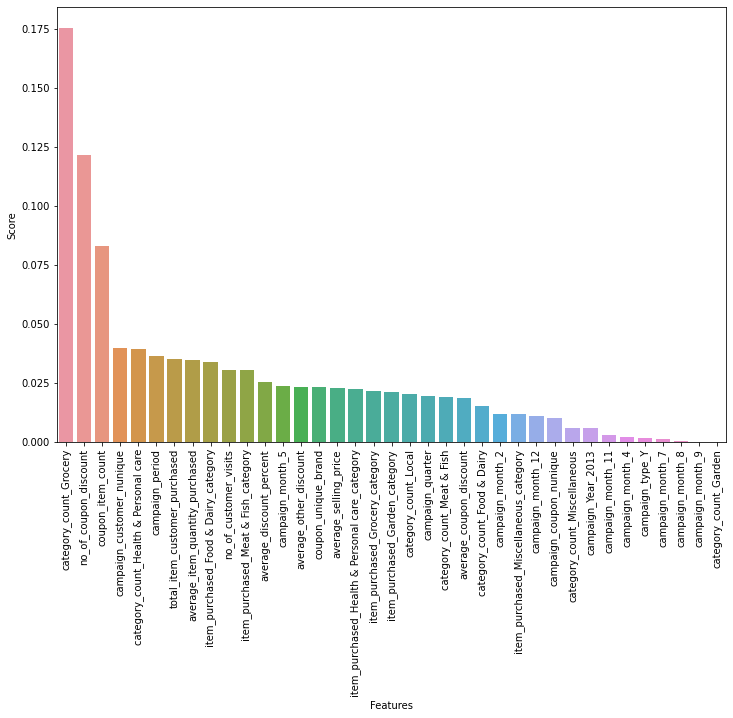

In [39]:
plt.figure(figsize=(12,8))
sns.barplot("Features","Score",data=dt_df)
plt.xticks(rotation=90)
plt.show()

In [178]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [179]:
ypred_train=dt.predict(xtrain)
ypred_test=dt.predict(xtest)

In [180]:
yprob=dt.predict_proba(xtest)

In [181]:
confusion_matrix(ytest,ypred_test)

array([[23125,   121],
       [  592,   619]])

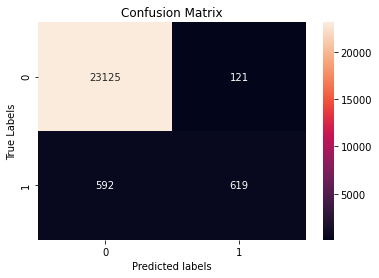

In [182]:
cm = confusion_matrix(ytest,ypred_test)
ax = sns.heatmap(cm,annot=True,fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [183]:
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn = cm[0,0]
sensitivity=(tp)/(tp+fn)
specificity=(tn)/(tn+fp)

In [184]:
print("Sensitivity",sensitivity)
print("Specificity",specificity)

Sensitivity 0.5111478117258464
Specificity 0.9947948034070377


ROC AUC = 0.921651793373897


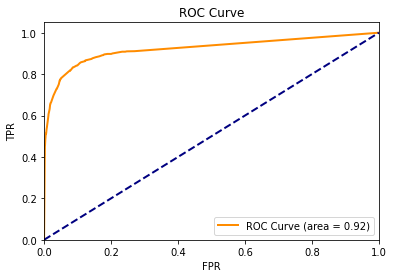

In [185]:
fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
roc_auc_dt = roc_auc_score(ytest,yprob[:,1])

print('ROC AUC =', roc_auc_dt)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [186]:
acc_train_dt= accuracy_score(ytrain,ypred_train)
acc_dt=accuracy_score(ytest,ypred_test)
pr_dt=precision_score(ytest,ypred_test)
rc_dt=recall_score(ytest,ypred_test)
f1_dt=f1_score(ytest,ypred_test)

In [187]:
print('Train Accuracy',acc_train_dt)
print('Test Accuracy =',acc_dt)
print('ROC_AUC =',roc_auc_dt)
print('Precision =',pr_dt)
print('Recall =',rc_dt)
print('F1 Score =',f1_dt)

Train Accuracy 0.9786559186892141
Test Accuracy = 0.9708467923293944
ROC_AUC = 0.921651793373897
Precision = 0.8364864864864865
Recall = 0.5111478117258464
F1 Score = 0.6345463864684777


In [188]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     23246
           1       0.84      0.51      0.63      1211

    accuracy                           0.97     24457
   macro avg       0.91      0.75      0.81     24457
weighted avg       0.97      0.97      0.97     24457



#### Hyperparameter tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt=DecisionTreeClassifier(random_state=0)

In [ ]:
parameter={'max_depth':np.arange(1,15),'criterion' : ['entropy','gini']}
GS=GridSearchCV(dt,parameter,cv=5,scoring='roc_auc')
GS.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,

In [ ]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [ ]:
# Rebuilding model with best parameter

In [ ]:
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 11,random_state=0)

In [ ]:
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
cv_dt=cross_val_score(dt,x,y,cv=kfold,scoring='roc_auc')

In [ ]:
# ROC_AUC Score
np.mean(cv_dt)

0.9315125816391389

In [ ]:
# Bias Error
1-np.mean(cv_dt)

0.06848741836086114

In [ ]:
# Variance Error
np.std(cv_dt,ddof=1)

0.0026838655828728677

### KNN Model

In [189]:
knn=KNeighborsClassifier(n_neighbors=23,weights='distance',p=1)

In [52]:
cv_knn=cross_val_score(knn,x,y,cv=kfold,scoring="roc_auc")

In [53]:
# roc_auc score
np.mean(cv_knn)

0.9683439838385051

In [54]:
# Bias Error
1-np.mean(cv_knn)

0.03165601616149494

In [55]:
# Variance Error
np.std(cv_knn,ddof=1)

0.002784584286063411

In [190]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=1,
                     weights='distance')

In [191]:
ypred_train=knn.predict(xtrain)
ypred=knn.predict(xtest)

yprob=knn.predict_proba(xtest)

In [192]:
confusion_matrix(ytest,ypred)

array([[23103,   143],
       [  597,   614]])

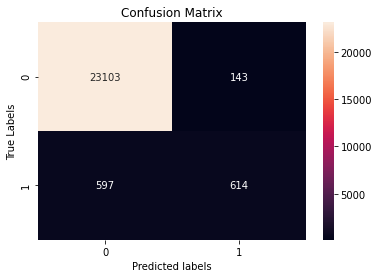

In [193]:
cm = confusion_matrix(ytest,ypred)
ax = sns.heatmap(cm,annot=True,fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [194]:
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn = cm[0,0]
sensitivity=(tp)/(tp+fn)
specificity=(tn)/(tn+fp)

In [195]:
print("Sensitivity",sensitivity)
print("Specificity",specificity)

Sensitivity 0.5070189925681255
Specificity 0.9938484040264992


In [196]:
fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
roc_auc_knn = roc_auc_score(ytest,yprob[:,1])
print('ROC AUC =', roc_auc_knn)

ROC AUC = 0.977143328886111


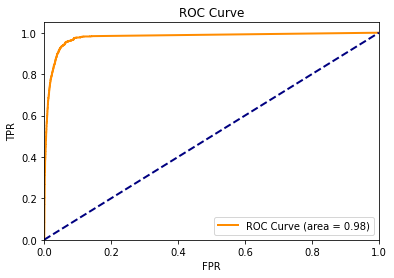

In [197]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_knn)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [198]:
acc_train_knn=accuracy_score(ytrain,ypred_train)
acc_knn=accuracy_score(ytest,ypred)
pr_knn=precision_score(ytest,ypred)
rc_knn=recall_score(ytest,ypred)
f1_knn=f1_score(ytest,ypred)

In [199]:
print('Train Accuracy',acc_train_knn)
print('Test Accuracy =',acc_knn)
print('ROC_AUC =',roc_auc_knn)
print('Precision =',pr_knn)
print('Recall =',rc_knn)
print('F1 Score =',f1_knn)

Train Accuracy 0.99975466573206
Test Accuracy = 0.9697428139183056
ROC_AUC = 0.977143328886111
Precision = 0.8110964332892999
Recall = 0.5070189925681255
F1 Score = 0.6239837398373984


In [200]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23246
           1       0.81      0.51      0.62      1211

    accuracy                           0.97     24457
   macro avg       0.89      0.75      0.80     24457
weighted avg       0.97      0.97      0.97     24457



In [ ]:
# Hyperparameter tuning

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
param={'n_neighbors':np.arange(3,25),'weights':['uniform','distance'],'p':[1,2]}
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
GS=GridSearchCV(knn,param,cv=kfold,scoring='roc_auc')
GS.fit(x,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
GS.best_params_

{'n_neighbors': 23, 'p': 1, 'weights': 'distance'}

In [ ]:
# Rebuilding model with best parameter

In [ ]:
knn=KNeighborsClassifier(n_neighbors=23,weights='distance',p=1)

In [ ]:
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
cv_knn=cross_val_score(knn,x,y,cv=kfold,scoring='roc_auc')

In [ ]:
#ROC_AUC score
np.mean(cv_knn)

0.9804649864284123

In [ ]:
#Bias error
1-np.mean(cv_knn)

0.01953501357158771

In [ ]:
# Variance error
np.std(cv_knn,ddof=1)

0.001916774368166651

### Support Vector Machine Model

In [157]:
svc=SVC(probability=True)

In [158]:
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
cv_svc=cross_val_score(svc,x,y,cv=kfold,scoring="roc_auc")

In [159]:
# roc_auc score
np.mean(cv_svc)

0.8023758119874771

In [160]:
# Bias Error
1-np.mean(cv_svc)

0.1976241880125229

In [161]:
# Variance Error
np.std(cv_svc,ddof=1)

0.014869770408500783

In [ ]:
svc.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
ypred=svc.predict(xtest)
ypred_train=svc.predict(xtrain)
yprob=svc.predict_proba(xtest)

In [ ]:
confusion_matrix(ytest,ypred)

array([[23233,    13],
       [ 1178,    33]])

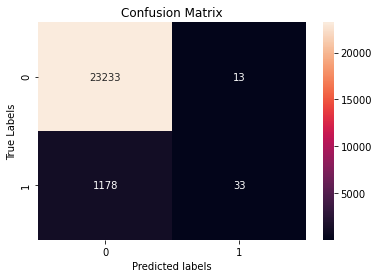

In [ ]:
cm = confusion_matrix(ytest,ypred)
ax = sns.heatmap(cm,annot=True,fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn = cm[0,0]
sensitivity=(tp)/(tp+fn)
specificity=(tn)/(tn+fp)

In [ ]:
print("Sensitivity",sensitivity)
print("Specificity",specificity)

Sensitivity 0.027250206440957887
Specificity 0.999440764002409


In [ ]:
fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
roc_auc_svc = roc_auc_score(ytest,yprob[:,1])
print('ROC AUC =', roc_auc_svc)

ROC AUC = 0.8011099003350016


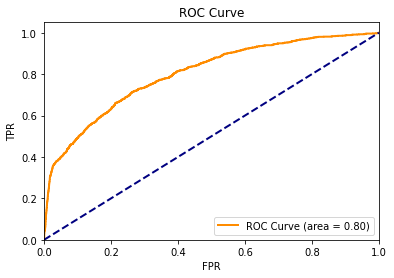

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_svc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
acc_train_svc=accuracy_score(ytrain,ypred_train)
acc_svc=accuracy_score(ytest,ypred)
pr_svc=precision_score(ytest,ypred)
rc_svc=recall_score(ytest,ypred)
f1_svc=f1_score(ytest,ypred)

In [ ]:
print('Train Accuracy',acc_train_svc)
print('Test Accuracy =',acc_svc)
print('ROC_AUC =',roc_auc_svc)
print('Precision =',pr_svc)
print('Recall =',rc_svc)
print('F1 Score =',f1_svc)

Train Accuracy 0.9540874441426443
Test Accuracy = 0.9513022856441918
ROC_AUC = 0.8011099003350016
Precision = 0.717391304347826
Recall = 0.027250206440957887
F1 Score = 0.05250596658711217


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     23246
           1       0.72      0.03      0.05      1211

    accuracy                           0.95     24457
   macro avg       0.83      0.51      0.51     24457
weighted avg       0.94      0.95      0.93     24457



### Random Forest Model

In [201]:
rf=RandomForestClassifier(criterion='gini',random_state=0,n_estimators=98)

In [68]:
cv_rf=cross_val_score(rf,x,y,cv=5,scoring="roc_auc")

In [69]:
# roc_auc score
np.mean(cv_rf)

0.9848877104522957

In [70]:
# Bias Error
1-np.mean(cv_rf)


0.015112289547704272

In [71]:
# Variance Error
np.std(cv_rf,ddof=1)

0.026239816661727502

In [72]:
rf.fit(x,y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
rf_df=pd.DataFrame({"Features":x.columns,'Score':rf.feature_importances_}).sort_values("Score",ascending=False).reset_index(drop=True)
rf_df.head()

,Features,Score
0,category_count_Grocery,0.106872
1,coupon_item_count,0.093751
2,no_of_coupon_discount,0.070887
3,average_coupon_discount,0.044982
4,campaign_customer_nunique,0.036938


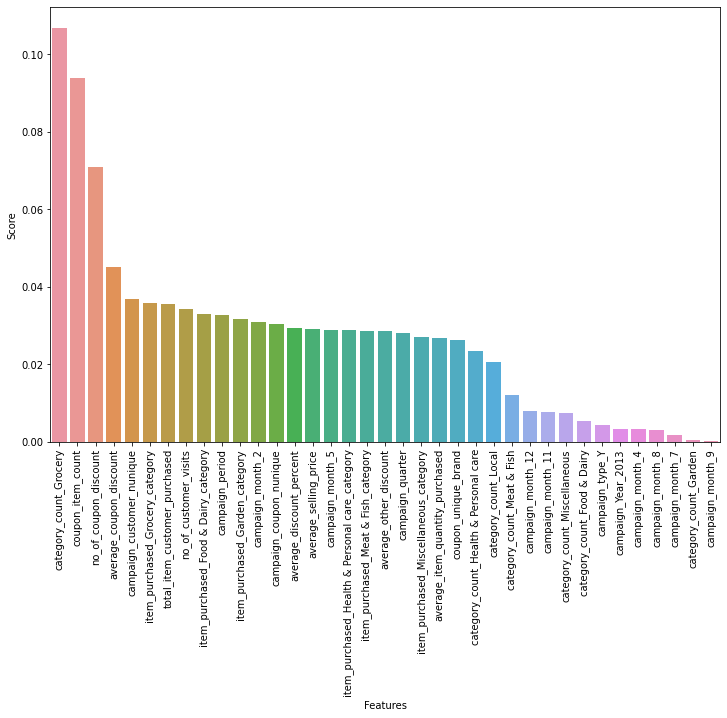

In [74]:
plt.figure(figsize=(12,8))
sns.barplot("Features","Score",data=rf_df)
plt.xticks(rotation=90)
plt.show()

In [202]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=98,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [203]:
ypred=rf.predict(xtest)
ypred_train=rf.predict(xtrain)
yprob=rf.predict_proba(xtest)


In [204]:
confusion_matrix(ytest,ypred)

array([[23120,   126],
       [  368,   843]])

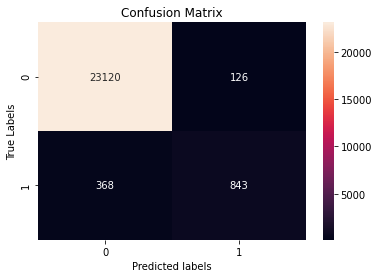

In [205]:
cm = confusion_matrix(ytest,ypred)
ax = sns.heatmap(cm,annot=True,fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [206]:
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn = cm[0,0]
sensitivity=(tp)/(tp+fn)
specificity=(tn)/(tn+fp)

In [207]:
print("Sensitivity",sensitivity)
print("Specificity",specificity)

Sensitivity 0.6961189099917423
Specificity 0.9945797126387336


In [208]:
fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
roc_auc_rf = roc_auc_score(ytest,yprob[:,1])
print('ROC AUC =', roc_auc_rf)


ROC AUC = 0.9824203348908201


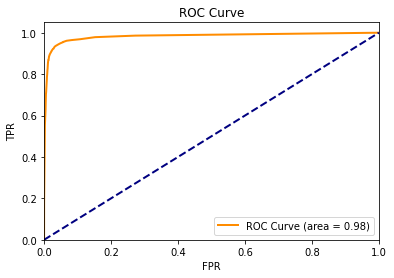

In [209]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_rf)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [210]:
acc_train_rf=accuracy_score(ytrain,ypred_train)
acc_rf=accuracy_score(ytest,ypred)
pr_rf=precision_score(ytest,ypred)
rc_rf=recall_score(ytest,ypred)
f1_rf=f1_score(ytest,ypred)

In [211]:
print('Train Accuracy',acc_train_rf)
print('Test Accuracy =',acc_rf)
print('ROC_AUC =',roc_auc_rf)
print('Precision =',pr_rf)
print('Recall =',rc_rf)
print('F1 Score =',f1_rf)

Train Accuracy 0.99975466573206
Test Accuracy = 0.979801283886004
ROC_AUC = 0.9824203348908201
Precision = 0.8699690402476781
Recall = 0.6961189099917423
F1 Score = 0.773394495412844


In [212]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     23246
           1       0.87      0.70      0.77      1211

    accuracy                           0.98     24457
   macro avg       0.93      0.85      0.88     24457
weighted avg       0.98      0.98      0.98     24457



In [87]:
rf=RandomForestClassifier(random_state=0)
param={'n_estimators':np.arange(2,100),'criterion':['entropy','gini']}
GS=GridSearchCV(rf,param,cv=kfold,scoring='roc_auc')
GS.fit(x,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fra...
                         'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 2

In [88]:
GS.best_params_

{'criterion': 'gini', 'n_estimators': 98}

In [ ]:
# Rebuilding model using best parameters

In [89]:
rf=RandomForestClassifier(criterion='gini',random_state=0,n_estimators=98)

In [90]:
cv_rf=cross_val_score(rf,x,y,cv=kfold,scoring='roc_auc')

In [91]:
# ROC_AUC score
np.mean(cv_rf)

0.9842481038927515

In [92]:
# Bias Error
1-np.mean(cv_rf)

0.015751896107248475

In [93]:
# Variance error
np.std(cv_rf,ddof=1)

0.0020972175880669694

In [ ]:
### KNN Bagging model

In [213]:
knn=KNeighborsClassifier()
bag=BaggingClassifier(base_estimator=knn,random_state=0,n_estimators=32)

In [95]:
cv_bag=cross_val_score(bag,x,y,cv=kfold,scoring="roc_auc")

In [96]:
np.mean(cv_bag)

0.9756503010299558

In [97]:
# Bias error
1-np.mean(cv_bag)

0.024349698970044242

In [98]:
np.std(cv_bag,ddof=1)

0.001699007252592343

In [214]:
bag.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=32, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [215]:
ypred=bag.predict(xtest)
ypred_train=bag.predict(xtrain)
yprob=bag.predict_proba(xtest)


In [216]:
confusion_matrix(ytest,ypred)

array([[22939,   307],
       [  419,   792]])

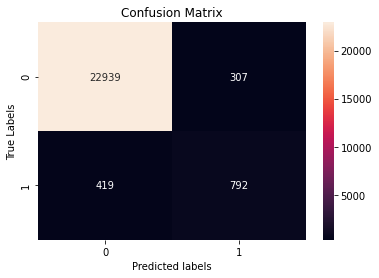

In [217]:
cm = confusion_matrix(ytest,ypred)
ax = sns.heatmap(cm,annot=True,fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [218]:
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn = cm[0,0]
sensitivity=(tp)/(tp+fn)
specificity=(tn)/(tn+fp)

In [219]:
print("Sensitivity",sensitivity)
print("Specificity",specificity)

Sensitivity 0.6540049545829892
Specificity 0.9867934268261206


In [220]:
fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
roc_auc_bag = roc_auc_score(ytest,yprob[:,1])
print('ROC AUC =', roc_auc_bag)

ROC AUC = 0.9762444768207461


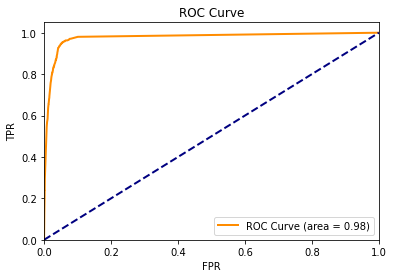

In [221]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_bag)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [222]:
acc_train_bag=accuracy_score(ytrain,ypred_train)
acc_bag=accuracy_score(ytest,ypred)
pr_bag=precision_score(ytest,ypred)
rc_bag=recall_score(ytest,ypred)
f1_bag=f1_score(ytest,ypred)

In [223]:
print('Train Accuracy',acc_train_bag)
print('Test Accuracy =',acc_bag)
print('ROC_AUC =',roc_auc_bag)
print('Precision =',pr_bag)
print('Recall =',rc_bag)
print('F1 Score =',f1_bag)

Train Accuracy 0.9826864102339438
Test Accuracy = 0.9703152471684998
ROC_AUC = 0.9762444768207461
Precision = 0.7206551410373067
Recall = 0.6540049545829892
F1 Score = 0.6857142857142857


In [224]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     23246
           1       0.72      0.65      0.69      1211

    accuracy                           0.97     24457
   macro avg       0.85      0.82      0.84     24457
weighted avg       0.97      0.97      0.97     24457



In [155]:
bag=BaggingClassifier(base_estimator=knn,random_state=0)
param={'n_estimators':np.arange(2,50)}
GS=RandomizedSearchCV(bag,param,cv=kfold,scoring='roc_auc')
GS.fit(x,y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                                   leaf_size=30,
                                                                                   metric='minkowski',
                                                                                   metric_params=None,
                                                                                   n_jobs=None,
                                                                                   n_neighbors=5,
                                                                                   p=2,
                                                                                   weights='uniform'),
                                               bootstrap=True,
                                         

In [156]:
GS.best_params_

{'n_estimators': 32}

In [ ]:
# Rebuilding model using best parameters
bag=BaggingClassifier(base_estimator=knn,random_state=0,n_estimators=32)


In [ ]:
cv_bag=cross_val_score(bag,x,y,cv=kfold,scoring='roc_auc')


In [ ]:
# ROC_AUC score
np.mean(cv_bag)

In [ ]:
# Bias Error
1-np.mean(cv_bag)

In [ ]:
# Variance error
np.std(cv_bag,ddof=1)

In [ ]:
### Boosting model

In [225]:
dt=DecisionTreeClassifier()
ab= AdaBoostClassifier(random_state=0,n_estimators=49)

In [114]:
cv_ab=cross_val_score(ab,x,y,cv=kfold,scoring='roc_auc')

In [115]:
np.mean(cv_ab)

0.9439108489201986

In [116]:
1-np.mean(cv_ab)

0.05608915107980139

In [117]:
np.std(cv_ab,ddof=1)

0.0031554164359245437

In [118]:
ab.fit(x,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=0)

In [123]:
ab_df=pd.DataFrame({"Features":x.columns,'Score':ab.feature_importances_}).sort_values("Score",ascending=False).reset_index(drop=True)
ab_df.head()


,Features,Score
0,item_purchased_Garden_category,0.100000
1,coupon_unique_brand,0.080000
2,category_count_Grocery,0.080000
3,no_of_customer_visits,0.080000
4,no_of_coupon_discount,0.060000


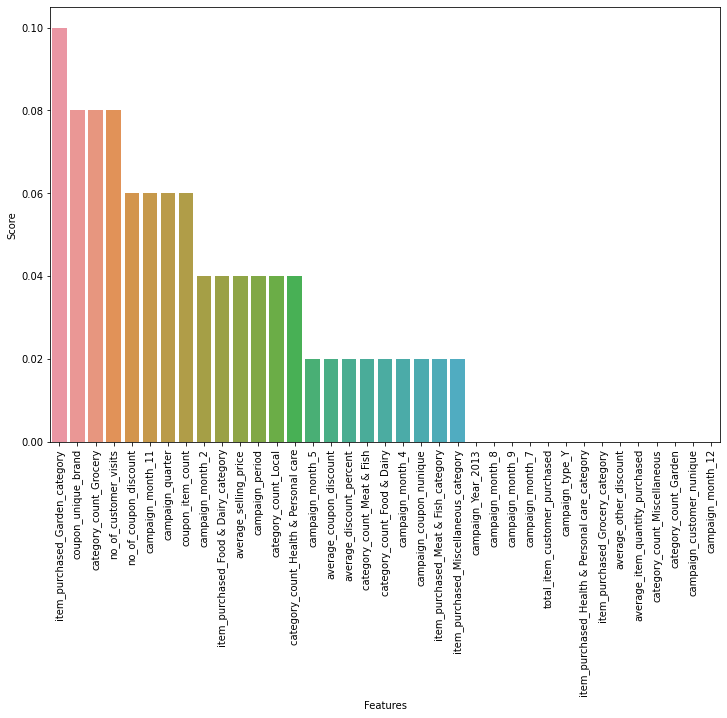

In [121]:
plt.figure(figsize=(12,8))
sns.barplot("Features","Score",data=ab_df)
plt.xticks(rotation=90)
plt.show()

In [226]:
ab.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=49, random_state=0)

In [227]:
ypred=ab.predict(xtest)
ypred_train=ab.predict(xtrain)
yprob=ab.predict_proba(xtest)


In [228]:
confusion_matrix(ytest,ypred)

array([[23181,    65],
       [  825,   386]])

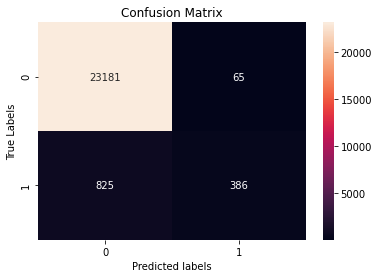

In [229]:
cm = confusion_matrix(ytest,ypred)
ax = sns.heatmap(cm,annot=True,fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [230]:
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn = cm[0,0]
sensitivity=(tp)/(tp+fn)
specificity=(tn)/(tn+fp)

In [231]:
print("Sensitivity",sensitivity)
print("Specificity",specificity)

Sensitivity 0.3187448389760528
Specificity 0.9972038200120451


In [232]:
fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
roc_auc_ab = roc_auc_score(ytest,yprob[:,1])
print('ROC AUC =', roc_auc_ab)

ROC AUC = 0.9458213351996557


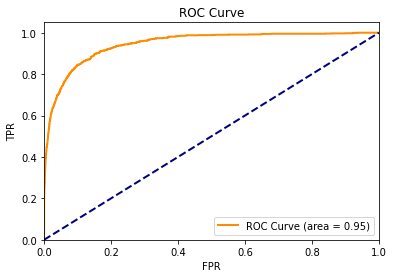

In [233]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_ab)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [234]:
acc_train_ab=accuracy_score(ytrain,ypred_train)
acc_ab=accuracy_score(ytest,ypred)
pr_ab=precision_score(ytest,ypred)
rc_ab=recall_score(ytest,ypred)
f1_ab=f1_score(ytest,ypred)

In [235]:
print('Train Accuracy',acc_train_ab)
print('Test Accuracy =',acc_ab)
print('ROC_AUC =',roc_auc_ab)
print('Precision =',pr_ab)
print('Recall =',rc_ab)
print('F1 Score =',f1_ab)

Train Accuracy 0.9659686322614562
Test Accuracy = 0.9636096005233675
ROC_AUC = 0.9458213351996557
Precision = 0.8558758314855875
Recall = 0.3187448389760528
F1 Score = 0.46450060168471713


In [236]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     23246
           1       0.86      0.32      0.46      1211

    accuracy                           0.96     24457
   macro avg       0.91      0.66      0.72     24457
weighted avg       0.96      0.96      0.96     24457



In [ ]:
# Hyperparameter tuning

In [164]:
ab=AdaBoostClassifier(base_estimator=dt,random_state=0)
param={'n_estimators':np.arange(2,50)}
RS=RandomizedSearchCV(ab,param,cv=kfold,scoring='roc_auc')
RS.fit(x,y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      m

In [165]:
RS.best_params_

{'n_estimators': 49}

In [ ]:
# Rebuilding model using best parameters
ab=AdaBoostClassifier(base_estimator=dt,random_state=0,n_estimators=49)

In [ ]:
cv_ab=cross_val_score(ab,x,y,cv=kfold,scoring='roc_auc')


In [ ]:
# ROC_AUC score
np.mean(cv_ab)


In [ ]:
# Bias Error
1-np.mean(cv_ab)


In [ ]:
# Variance error
np.std(cv_ab,ddof=1)

In [ ]:
# Gradient Boosting

In [237]:
gb=GradientBoostingClassifier(random_state=0,n_estimators=28)

In [137]:
cv_gb=cross_val_score(gb,x,y,cv=kfold,scoring='roc_auc')

In [138]:
np.mean(cv_gb)

0.96810167085786

In [139]:
1-np.mean(cv_gb)

0.03189832914213997

In [140]:
np.std(cv_gb,ddof=1)

0.003620464282572264

In [141]:
gb.fit(x,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [142]:
gb_df=pd.DataFrame({"Features":x.columns,'Score':gb.feature_importances_}).sort_values("Score",ascending=False).reset_index(drop=True)
gb_df.head()

,Features,Score
0,no_of_coupon_discount,0.235471
1,category_count_Grocery,0.156749
2,coupon_unique_brand,0.113417
3,campaign_month_2,0.060862
4,campaign_coupon_nunique,0.050578


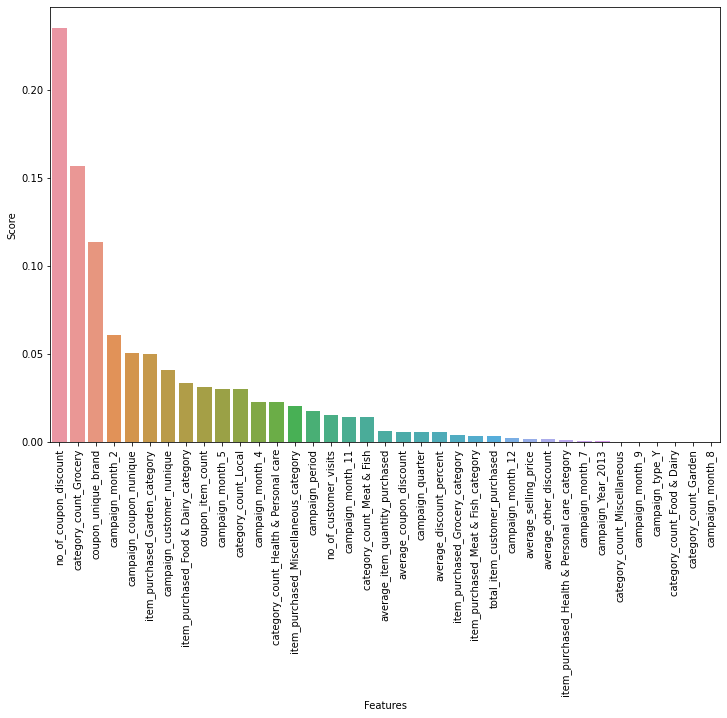

In [143]:
plt.figure(figsize=(12,8))
sns.barplot("Features","Score",data=gb_df)
plt.xticks(rotation=90)
plt.show()

In [238]:
gb.fit(xtrain,ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=28,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [239]:
ypred=gb.predict(xtest)
ypred_train=gb.predict(xtrain)
yprob=gb.predict_proba(xtest)


In [240]:
confusion_matrix(ytest,ypred)

array([[23214,    32],
       [  897,   314]])

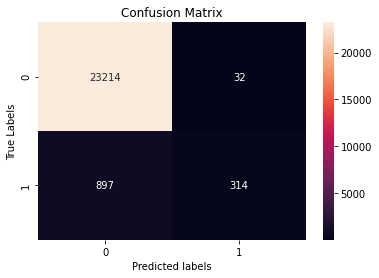

In [241]:
cm = confusion_matrix(ytest,ypred)
ax = sns.heatmap(cm,annot=True,fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [242]:
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]
tn = cm[0,0]
sensitivity=(tp)/(tp+fn)
specificity=(tn)/(tn+fp)

In [243]:
print("Sensitivity",sensitivity)
print("Specificity",specificity)

Sensitivity 0.259289843104872
Specificity 0.998623419082853


In [244]:
fpr,tpr,threshold = roc_curve(ytest,yprob[:,1])
roc_auc_gb = roc_auc_score(ytest,yprob[:,1])
print('ROC AUC =', roc_auc_gb)

ROC AUC = 0.9526523942071349


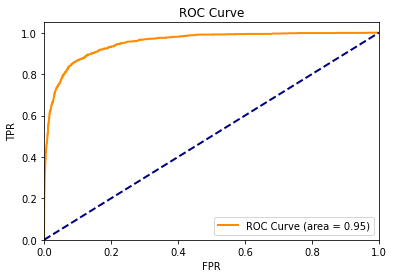

In [245]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_gb)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [246]:
acc_train_gb=accuracy_score(ytrain,ypred_train)
acc_gb=accuracy_score(ytest,ypred)
pr_gb=precision_score(ytest,ypred)
rc_gb=recall_score(ytest,ypred)
f1_gb=f1_score(ytest,ypred)

In [247]:
print('Train Accuracy',acc_train_gb)
print('Test Accuracy =',acc_gb)
print('ROC_AUC =',roc_auc_gb)
print('Precision =',pr_gb)
print('Recall =',rc_gb)
print('F1 Score =',f1_gb)

Train Accuracy 0.9647945325506002
Test Accuracy = 0.9620149650406836
ROC_AUC = 0.9526523942071349
Precision = 0.9075144508670521
Recall = 0.259289843104872
F1 Score = 0.40333975594091204


In [248]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23246
           1       0.91      0.26      0.40      1211

    accuracy                           0.96     24457
   macro avg       0.94      0.63      0.69     24457
weighted avg       0.96      0.96      0.95     24457



In [ ]:
# Hyperparameter tuning

In [162]:
gb=GradientBoostingClassifier()
param={'n_estimators':np.arange(2,30)}
RS=RandomizedSearchCV(gb,param,cv=kfold,scoring='roc_auc')
RS.fit(x,y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samp

In [163]:
RS.best_params_

{'n_estimators': 28}

In [ ]:
# Rebuilding model using best parameters
gb=GradientBoostingClassifier(n_estimators=28)
cv_gb=cross_val_score(gb,x,y,cv=kfold,scoring='roc_auc')

In [ ]:
# ROC_AUC score
np.mean(cv_gb)

In [ ]:
# Bias Error
1-np.mean(cv_gb)

In [ ]:
# Variance error
np.std(cv_gb,ddof=1)

In [166]:
results=[]
results.append(cv_dt)
results.append(cv_knn)
results.append(cv_svc)
results.append(cv_rf)
results.append(cv_bag)
results.append(cv_ab)
results.append(cv_gb)

In [167]:
results

[array([0.86601829, 0.85001447, 0.88046332, 0.85953413, 0.86909822]),
 array([0.963975  , 0.9707282 , 0.96957579, 0.96723012, 0.97021081]),
 array([0.79454668, 0.78045962, 0.80668999, 0.8144425 , 0.81574026]),
 array([0.98503025, 0.98250722, 0.9855854 , 0.98651757, 0.98160008]),
 array([0.97334134, 0.97617979, 0.97792577, 0.97596537, 0.97483925]),
 array([0.94465527, 0.93976298, 0.94726939, 0.94161092, 0.94625568]),
 array([0.96946259, 0.96272772, 0.97258382, 0.96873311, 0.96700111])]

In [250]:
names=["Decision Tree","KNN","Random Forest","KNN Bagging","AdaBoost","Gradient Boosting"]

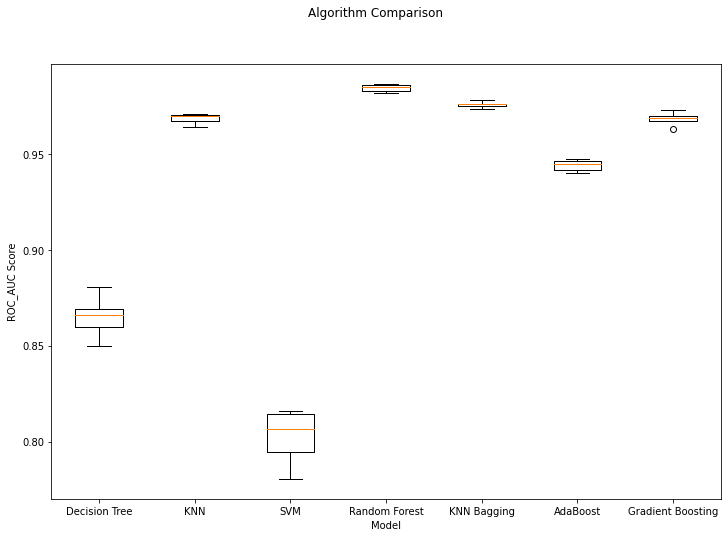

In [173]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("ROC_AUC Score")
plt.xlabel("Model")
ax.set_xticklabels(names)
plt.show()

In [174]:
acc_train_svc=0.9540874441426443
acc_svc = 0.9513022856441918
roc_auc_svc= 0.8011099003350016
pr_svc = 0.717391304347826
rc_svc = 0.027250206440957887
f1_svc = 0.05250596658711217


In [251]:
df1=pd.DataFrame({"Train Accuracy":[acc_train_dt,acc_train_knn,acc_train_rf,acc_train_bag,acc_train_ab,acc_train_gb],
                  "Test Accuracy":[acc_dt,acc_knn,acc_rf,acc_bag,acc_ab,acc_gb],
                  "ROC AUC":[roc_auc_dt,roc_auc_knn,roc_auc_rf,roc_auc_bag,roc_auc_ab,roc_auc_gb],
                  "Precision":[pr_dt,pr_knn,pr_rf,pr_bag,pr_ab,pr_gb],
                  "Recall":[rc_dt,rc_knn,rc_rf,rc_bag,rc_ab,rc_gb],
                  "F1 score":[f1_dt,f1_knn,f1_rf,f1_bag,f1_ab,f1_gb]},index=names)


In [252]:
df1

,Train Accuracy,Test Accuracy,ROC AUC,Precision,Recall,F1 score
Decision Tree,0.978656,0.970847,0.921652,0.836486,0.511148,0.634546
KNN,0.999755,0.969743,0.977143,0.811096,0.507019,0.623984
Random Forest,0.999755,0.979801,0.982420,0.869969,0.696119,0.773394
KNN Bagging,0.982686,0.970315,0.976244,0.720655,0.654005,0.685714
AdaBoost,0.965969,0.963610,0.945821,0.855876,0.318745,0.464501
Gradient Boosting,0.964795,0.962015,0.952652,0.907514,0.259290,0.403340
